In [77]:
pip install resampy

In [78]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
print(os.getcwd())

/content


In [80]:
data_path = '/content/drive/MyDrive/DST'
print(os.listdir(data_path))

['test', 'train', 'val']


In [81]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

test
train
val


In [82]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split
from pickle import dump
from pickle import load
import plotly
import plotly.graph_objs as go
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [83]:
test_data = data_path+"/test"
os.listdir(test_data)

['a_00000057_5000.wav',
 'a_00000099_5000.wav',
 'a_00000126_5000.wav',
 'a_00000055_5000.wav',
 'a_00000020_0.wav',
 'a_00000125_5000.wav',
 'a_00000019_0.wav',
 'a_00000053_5000.wav',
 'a_00000124_0.wav',
 'a_00000088_5000.wav',
 'a_00000077_0.wav',
 'a_00000075_0.wav',
 'a_00000074_0.wav',
 'a_00000101_0.wav',
 'a_00000078_5000.wav',
 'a_00000001_5000.wav',
 'a_00000065_0.wav',
 'a_00000090_0.wav',
 'a_00000028_0.wav',
 'a_00000027_5000.wav',
 'n_00000377_0.wav',
 'a_00000080_0.wav',
 'a_00000011_0.wav',
 'a_00000011_5000.wav',
 'n_00000377_5000.wav',
 'a_00000067_5000.wav',
 'a_00000087_0.wav',
 'a_00000098_0.wav',
 'a_00000085_5000.wav',
 'a_00000068_0.wav',
 'a_00000035_0.wav',
 'a_00000033_0.wav',
 'a_00000133_0.wav',
 'a_00000027_0.wav',
 'a_00000066_0.wav',
 'a_00000038_0.wav',
 'a_00000073_0.wav',
 'a_00000083_0.wav',
 'a_00000094_5000.wav',
 'a_00000076_0.wav',
 'a_00000030_5000.wav',
 'a_00000099_0.wav',
 'a_00000025_5000.wav',
 'a_00000043_0.wav',
 'a_00000091_0.wav',
 'a_

In [84]:
val_data = data_path+"/val"
os.listdir(val_data)

['a_00000130_5000.wav',
 'a_00000135_5000.wav',
 'n_00000326_5000.wav',
 'a_00000088_0.wav',
 'a_00000096_5000.wav',
 'n_00000289_5000.wav',
 'a_00000018_5000.wav',
 'a_00000007_0.wav',
 'a_00000035_5000.wav',
 'a_00000074_5000.wav',
 'a_00000106_5000.wav',
 'n_00000368_5000.wav',
 'a_00000116_0.wav',
 'a_00000129_5000.wav',
 'a_00000024_0.wav',
 'a_00000058_0.wav',
 'a_00000125_0.wav',
 'n_00000376_0.wav',
 'n_00000371_5000.wav',
 'a_00000032_5000.wav',
 'a_00000042_5000.wav',
 'a_00000064_5000.wav',
 'n_00000341_5000.wav',
 'a_00000010_0.wav',
 'a_00000036_0.wav',
 'a_00000008_5000.wav',
 'a_00000022_0.wav',
 'n_00000366_5000.wav',
 'a_00000102_5000.wav',
 'n_00000335_0.wav',
 'n_00000341_0.wav',
 'a_00000045_0.wav',
 'n_00000363_5000.wav',
 'a_00000117_5000.wav',
 'a_00000100_5000.wav',
 'a_00000062_0.wav',
 'a_00000072_0.wav',
 'n_00000338_0.wav',
 'a_00000001_0.wav',
 'n_00000346_0.wav',
 'n_00000301_0.wav',
 'a_00000013_5000.wav',
 'a_00000028_5000.wav',
 'n_00000295_5000.wav',
 

In [85]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [86]:
normal_test = test_data+"/n_*.wav"
abnormal_test = test_data+"/a_*.wav"

In [87]:
normal_test

'/content/drive/MyDrive/DST/test/n_*.wav'

In [88]:
normal_val

'/content/drive/MyDrive/DST/val/n_*.wav'

In [89]:
import librosa
import librosa.display

In [90]:
import glob

normal_test_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_test)
]

abnormal_test_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_test)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [91]:
print("Shape of normal_test_signals:", np.array(normal_test_signals, dtype=object).shape)
print("Shape of abnormal_test_signals:", np.array(abnormal_test_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_test_signals: (154, 110250)
Shape of abnormal_test_signals: (54, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [92]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [93]:
datasetFile = 'coffee_test.pkl'
save_dataset([normal_test_signals, abnormal_test_signals], datasetFile)

Saved: coffee_test.pkl


In [94]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [95]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_test_signals, abnormal_test_signals] = load_dataset(datasetFile)

In [96]:
len(normal_test_signals), len(abnormal_test_signals)

(154, 54)

In [97]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [98]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

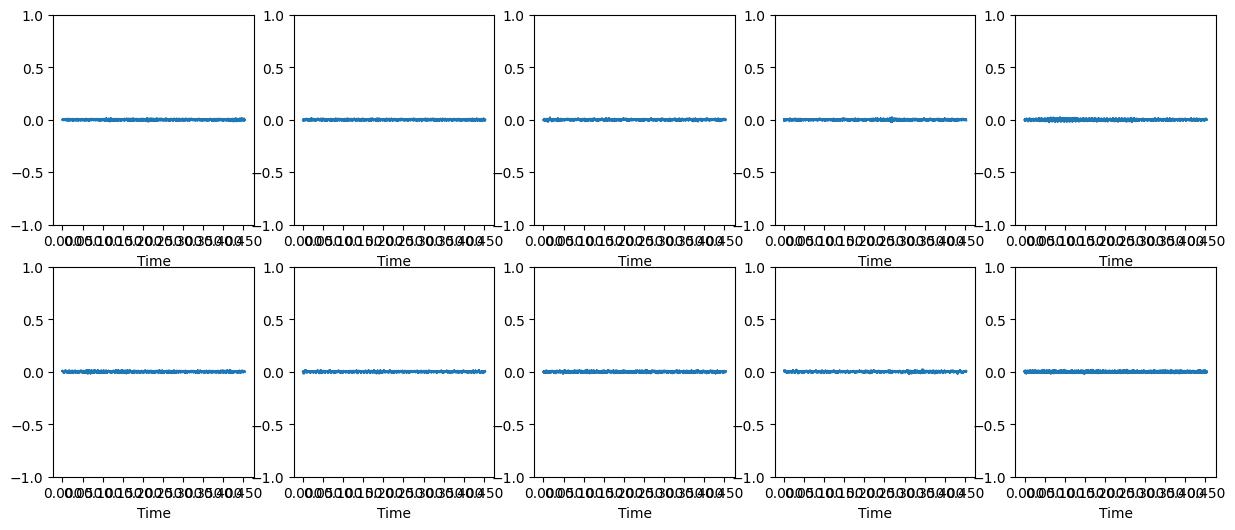

In [99]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_test_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

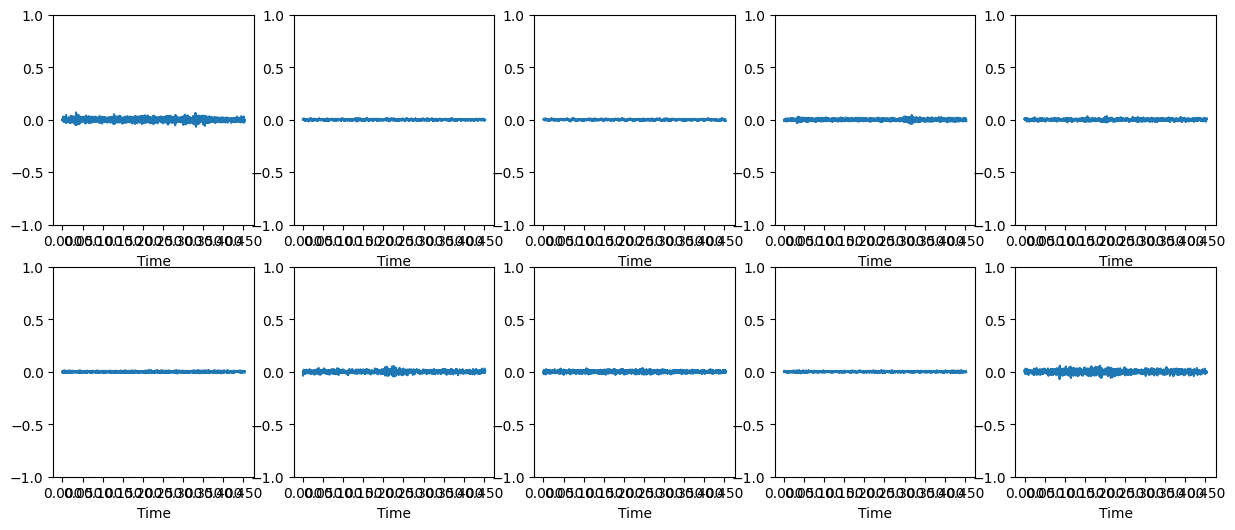

In [100]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_test_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [101]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [102]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [103]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [104]:
normal_test_features = np.array([extract_features(x) for x in normal_test_signals])
abnormal_test_features = np.array([extract_features(x) for x in abnormal_test_signals])

In [105]:
print(normal_test_features.shape)
print(abnormal_test_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(154, 2)
(54, 2)
(119, 2)
(47, 2)


In [106]:
print(normal_test_features[10])
print(abnormal_test_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[4.15039062e-02 1.60556549e+03]
[4.10156250e-02 2.06946393e+03]
[4.15039062e-02 1.76527587e+03]
[3.46679688e-02 1.44163207e+03]


Text(0, 0.5, 'Count')

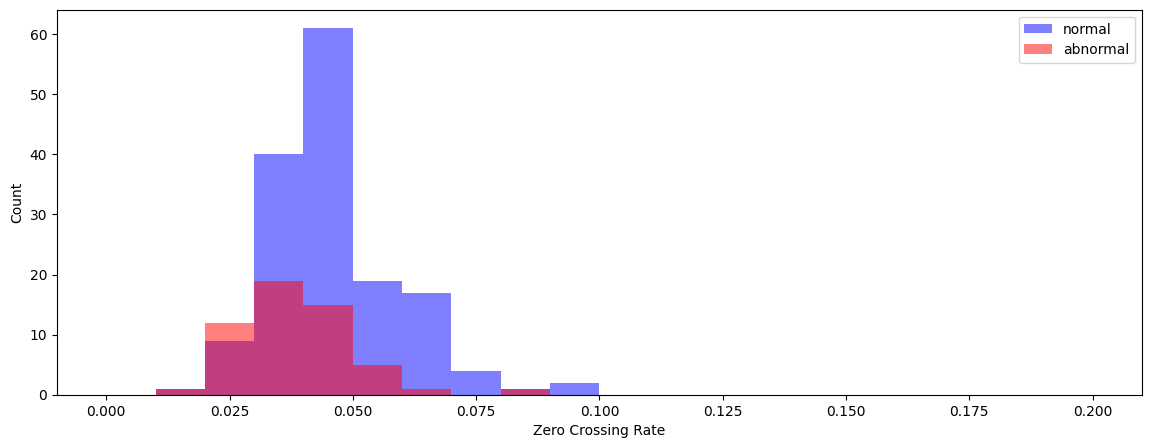

In [107]:
plt.figure(figsize=(14, 5))
plt.hist(normal_test_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_test_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

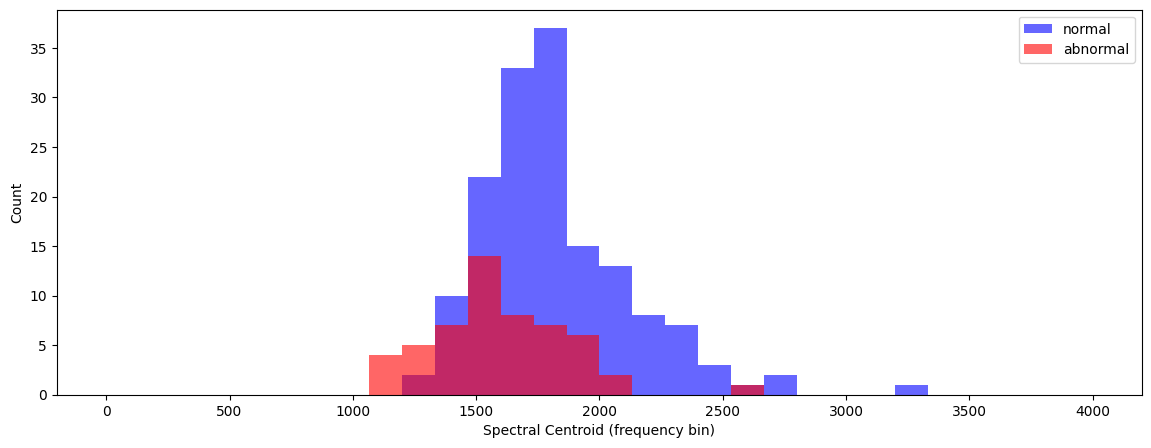

In [108]:
plt.figure(figsize=(14, 5))
plt.hist(normal_test_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_test_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [109]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [110]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
print(feature_test_table.shape)

(208, 2)


In [111]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
testing_features = scaler.fit_transform(feature_test_table)
print(testing_features.min(axis=0))
print(testing_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [112]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

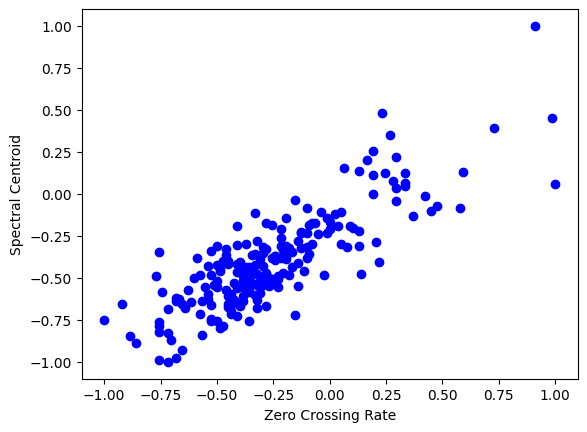

In [113]:
plt.scatter(testing_features[:489,0], testing_features[:489,1], c='b')
plt.scatter(testing_features[489:,0], testing_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [114]:
y_test_total = [0 for i in range(len(normal_test_signals))] + [1 for i in range(len(abnormal_test_signals))]
y_val_total = [0 for i in range(len(normal_val_signals))] + [1 for i in range(len(abnormal_val_signals))]

In [115]:
y_test_encoded = to_categorical(y_test_total)
y_val_encoded = to_categorical(y_val_total)

In [116]:
y_test_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [117]:
x_test = testing_features
y_test = y_test_encoded
x_val = val_features
y_val = y_val_encoded

In [118]:
x_test.shape, y_test.shape

((208, 2), (208, 2))

In [119]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [120]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [121]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [122]:
his = model.fit(
    x_test,
    y_test,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3392 - loss: 0.8094 - val_accuracy: 0.2831 - val_loss: 0.8965
Epoch 2/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4301 - loss: 0.7461 - val_accuracy: 0.2892 - val_loss: 0.8580
Epoch 3/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4908 - loss: 0.7383 - val_accuracy: 0.2892 - val_loss: 0.8262
Epoch 4/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5094 - loss: 0.7064 - val_accuracy: 0.2952 - val_loss: 0.7992
Epoch 5/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5482 - loss: 0.7155 - val_accuracy: 0.3133 - val_loss: 0.7760
Epoch 6/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6532 - loss: 0.6923 - val_accuracy: 0.3193 - val_loss: 0.7561
Epoch 7/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6666 - loss: 0.6668 - val_accuracy: 0.3554 - val_loss: 0.7369
Epoch 8/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6772 - loss: 0.6692 - val_accu

In [123]:
import plotly
import plotly.graph_objs as go

In [124]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [125]:
file_name = '/content/drive/MyDrive/DST/test/a_00000003_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


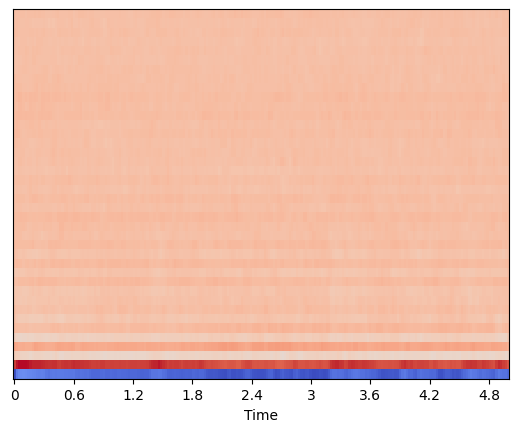

In [126]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [127]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [128]:
normal_test_features = []
for file_name in glob.glob(normal_test):
    data = extract_features(file_name)
    normal_test_features.append(data)

abnormal_test_features = []
for file_name in glob.glob(abnormal_test):
    data = extract_features(file_name)
    abnormal_test_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [129]:
normal_test_features[0].shape

(40, 216)

In [130]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
print(feature_test_table.shape)

(208, 40, 216)


In [131]:
y_test_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [132]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [133]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [134]:
x_test = feature_test_table.reshape(feature_test_table.shape[0], feature_test_table.shape[1], feature_test_table.shape[2], 1)
x_val = feature_val_table
y_test = y_test_encoded
y_val = y_val_encoded

In [135]:
x_test.shape, x_val.shape, y_test.shape, y_val.shape

((208, 40, 216, 1), (166, 40, 216, 1), (208, 2), (166, 2))

In [136]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [137]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, activation='relu', input_shape=(num_rows, num_columns, num_channels)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [138]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [139]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [140]:
his = model.fit(x_test, y_test, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5879 - loss: 6.5558 
Epoch 1: val_loss improved from inf to 4.13429, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5761 - loss: 6.5398 - val_accuracy: 0.7169 - val_loss: 4.1343
Epoch 2/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 6.9758
Epoch 2: val_loss improved from 4.13429 to 2.92913, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7477 - loss: 7.4854 - val_accuracy: 0.7169 - val_loss: 2.9291
Epoch 3/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7188 - loss: 5.8916
Epoch 3: val_loss improved from 2.92913 to 1.55545, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7118 - loss: 4.1336 - val_accuracy: 0.2831 - val_loss: 1.5554
Epoch 4/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2812 - loss: 3.4125
Epoch 4: val_loss improved from 1.55545 to 1.14251, saving model to best_mode

In [141]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [142]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [143]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [144]:
test_res = model.evaluate(x_test, y_test, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in test_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Testing  - loss: {test_res['loss']:.4f}, acc: {test_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")

Testing  - loss: 0.2270, acc: 0.9471
Validation- loss: 0.2902, acc: 0.8976


In [145]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [146]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 17  30]]


In [147]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.8750    1.0000    0.9333       119
    abnormal     1.0000    0.6383    0.7792        47

    accuracy                         0.8976       166
   macro avg     0.9375    0.8191    0.8563       166
weighted avg     0.9104    0.8976    0.8897       166



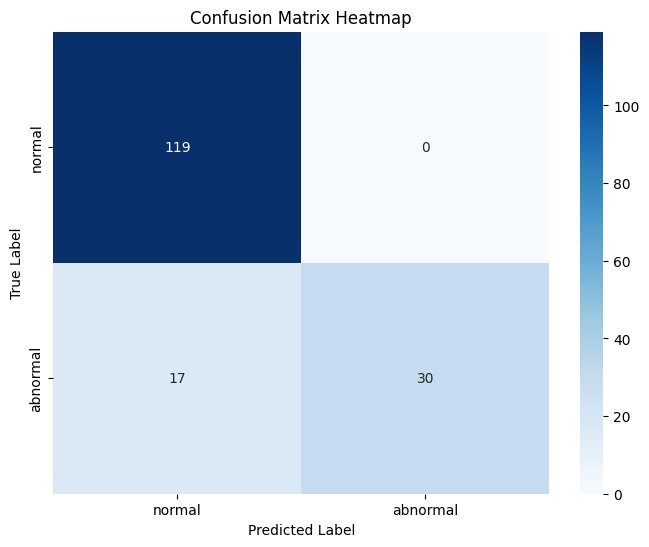

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()